In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils import read_dataset
from custom_dataloader import CarMovementDataset, resize_and_pad, split_and_stack, resize
import torchvision.transforms as transforms

In [2]:

def show_images(images, labels):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    for i, img in enumerate(images):
        # Ensure img is in C x H x W format for unnormalization
        # If img was permuted before to H x W x C, revert it back with img = img.permute(2, 0, 1)
        
        # Unnormalize
        img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        img = img.clip(0, 1)

        # Convert back to H x W x C for matplotlib
        img = img.permute(1, 2, 0).numpy()
        
        axs[i].imshow(img)
        axs[i].set_title(f'Label: {labels[i]}')
        axs[i].axis('off')
    plt.show()

In [3]:
file_path = 'C:/Users/janny/Aalto_project_2/data/elsaesserstr1_dataset.txt'
n_rows = 5

pairs, labels = read_dataset(file_path, n_rows)

In [5]:
transform = transforms.Compose([
    # transforms.Lambda(lambda img: resize_and_pad(img, target_width=512)),
    transforms.Lambda(lambda img: resize(img, target_width=512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = CarMovementDataset(pairs=pairs, labels=labels, transform=transform)

dataloader = DataLoader(dataset, batch_size=5, shuffle=False)

torch.Size([5, 3, 106, 512])


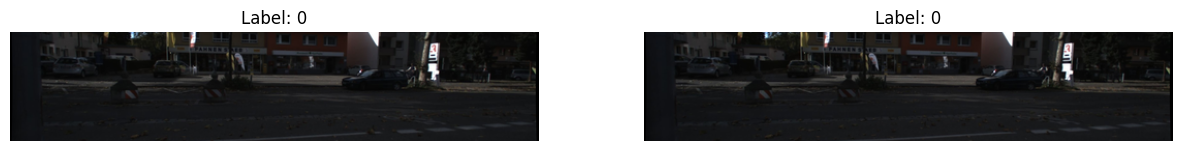

torch.Size([5, 3, 106, 512])


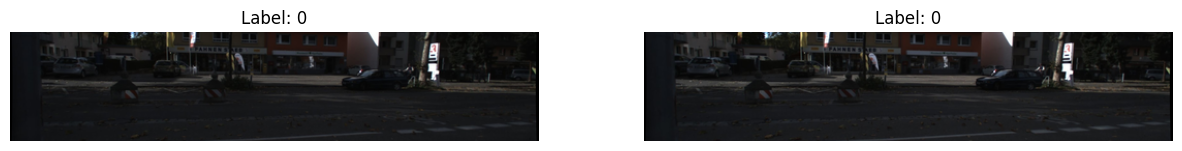

torch.Size([5, 3, 106, 512])


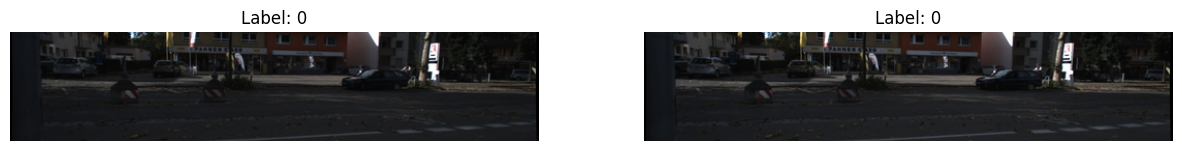

torch.Size([5, 3, 106, 512])


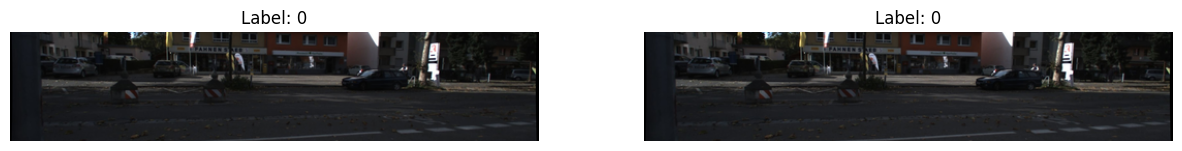

torch.Size([5, 3, 106, 512])


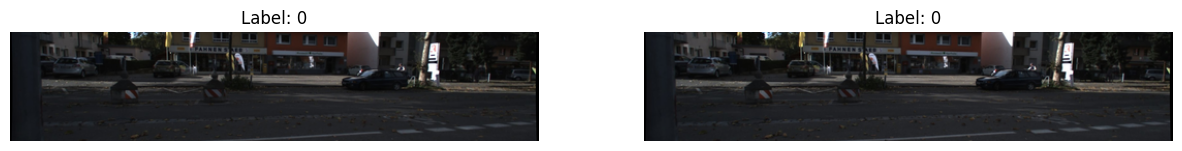

In [6]:
# Iterate through the DataLoader and visualize the first batch
for (image1, image2), label in dataloader:
    for i in range(len(image1)):
        print(image1.size())
        show_images([image1[i], image2[i]], label)
    break  # Just show the first batch for demonstration